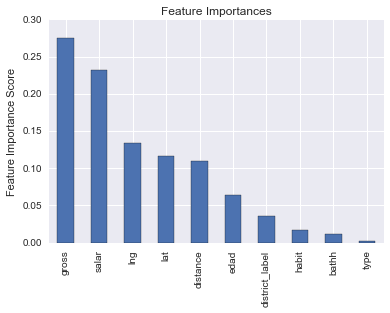

In [4]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import ensemble
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.externals import joblib
%matplotlib inline


#--------------------------------------------------------------------
#Import the da
df = pd.read_csv("datasets/workproject")

df1 = df[df.rent <= 100000]

X_col = [ "gross", "distance", "lat", "lng", "edad", "salar", "bathh", "type", "habit", "district_label"]
X = df1[X_col]
y = df1.rent


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)


tuned_parameters = {
    "n_estimators": [ 1400],
    "max_depth" : [ 12],
    "learning_rate": [ 0.01 ],
    "min_samples_split" : [ 50],
    "loss" : [ 'ls', 'lad' ]
}

gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
        scoring='median_absolute_error', n_jobs = 4)
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_
feat_imp =pd.Series(best.feature_importances_, X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

filename = "Models/Price/rent_predict_price.joblib.pkl"

_ = joblib.dump(best, filename, compress=9)